In [1]:
from ultralytics import YOLO
# import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/root/.pyenv/versions/3.11.6/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/root/.pyenv/versions/3.11.6/lib/python3.11/site-packages/ultralytics/cfg/__init__.py", line 413, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/root/.pyenv/versions/3.11.6/lib/python3.11/site-packages/ultralytics/utils/checks.py'>'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose', 'obb')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="tPROuQPxaAAaWpQafMTn")
project = rf.workspace("xray-annotations").project("chest-abnormalities")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.237, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Chest-abnormalities-1 in yolov8:: 100%|██████████| 20928/20928 [00:30<00:00, 696.51it/s] 


In [3]:
print(dataset.location)

/root/Work/yolov8/yolov8_medical/Chest-abnormalities-1


In [9]:
!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=100 imgsz=640
# !yolo task=segment mode=train model=yolov8x-seg.pt data=/root/Work/yolov8 copy/Salud_Ojos-1/data.yaml epochs=50 imgsz=640

New https://pypi.org/project/ultralytics/8.1.6 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.237 🚀 Python-3.11.6 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/root/Work/yolov8/yolov8_medical/Chest-abnormalities-1/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train18, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=Non

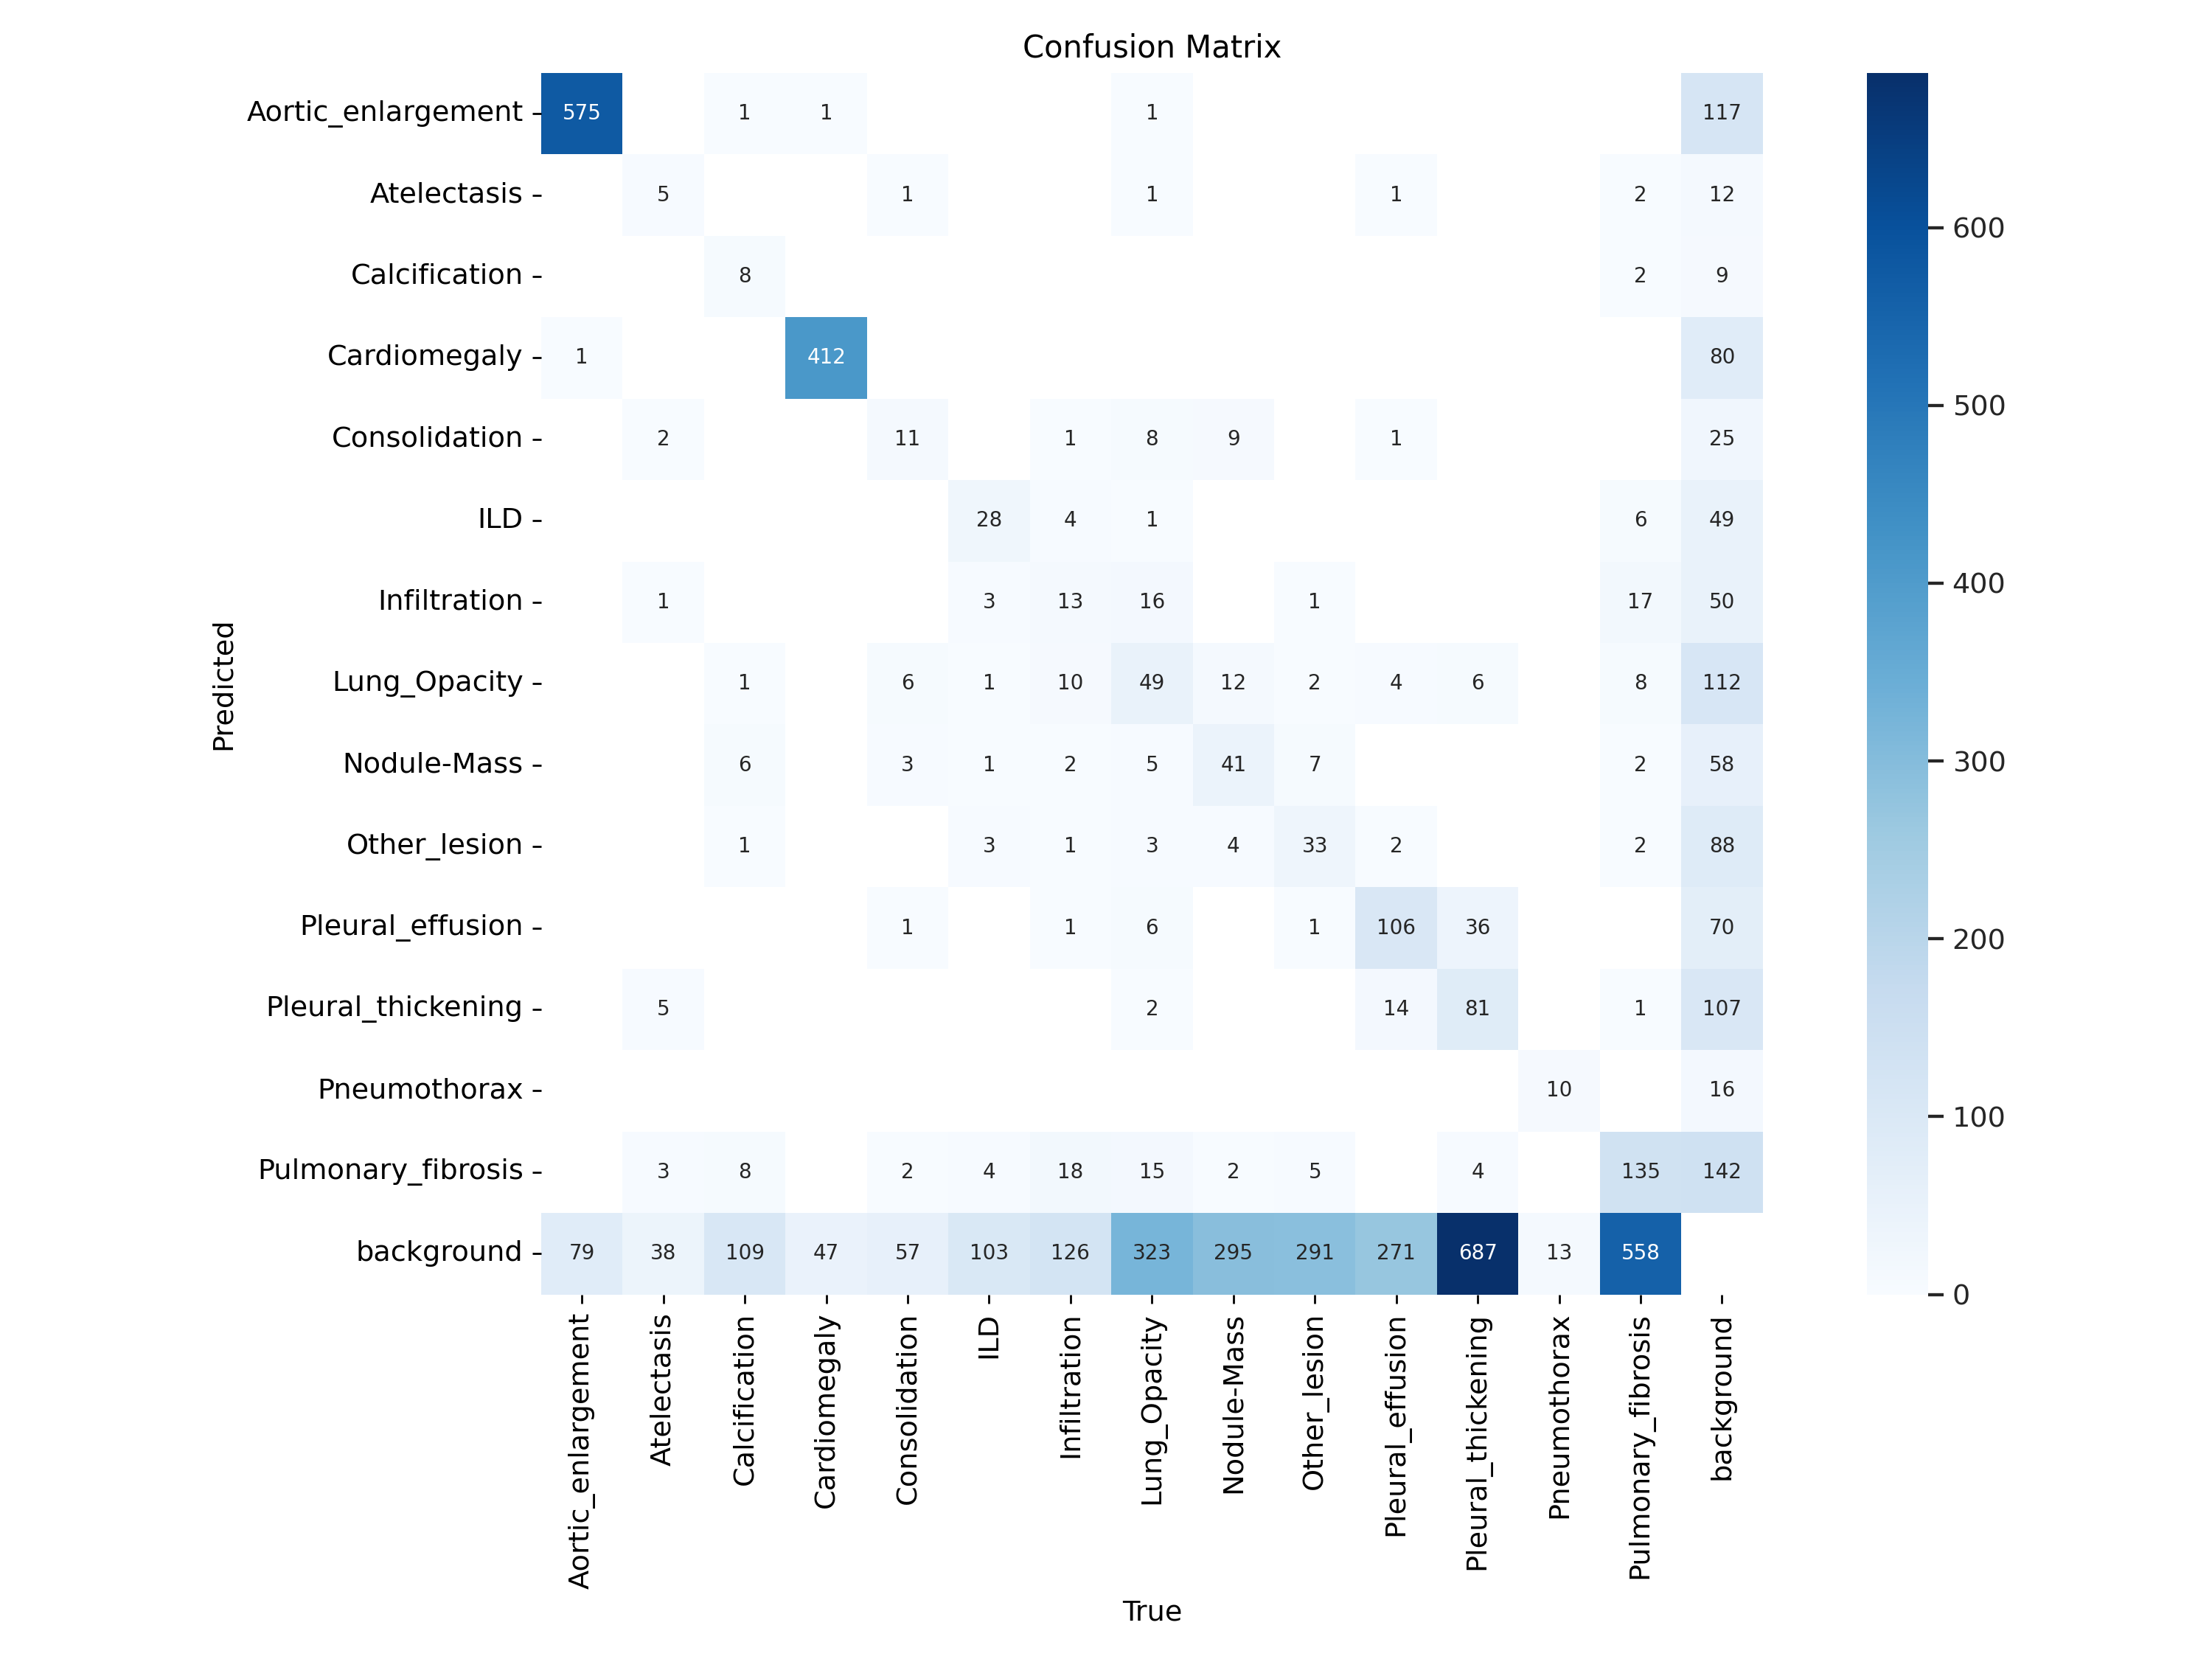

In [6]:
Image(filename=f'/root/.pyenv/runs/detect/train12/confusion_matrix.png', width=900)

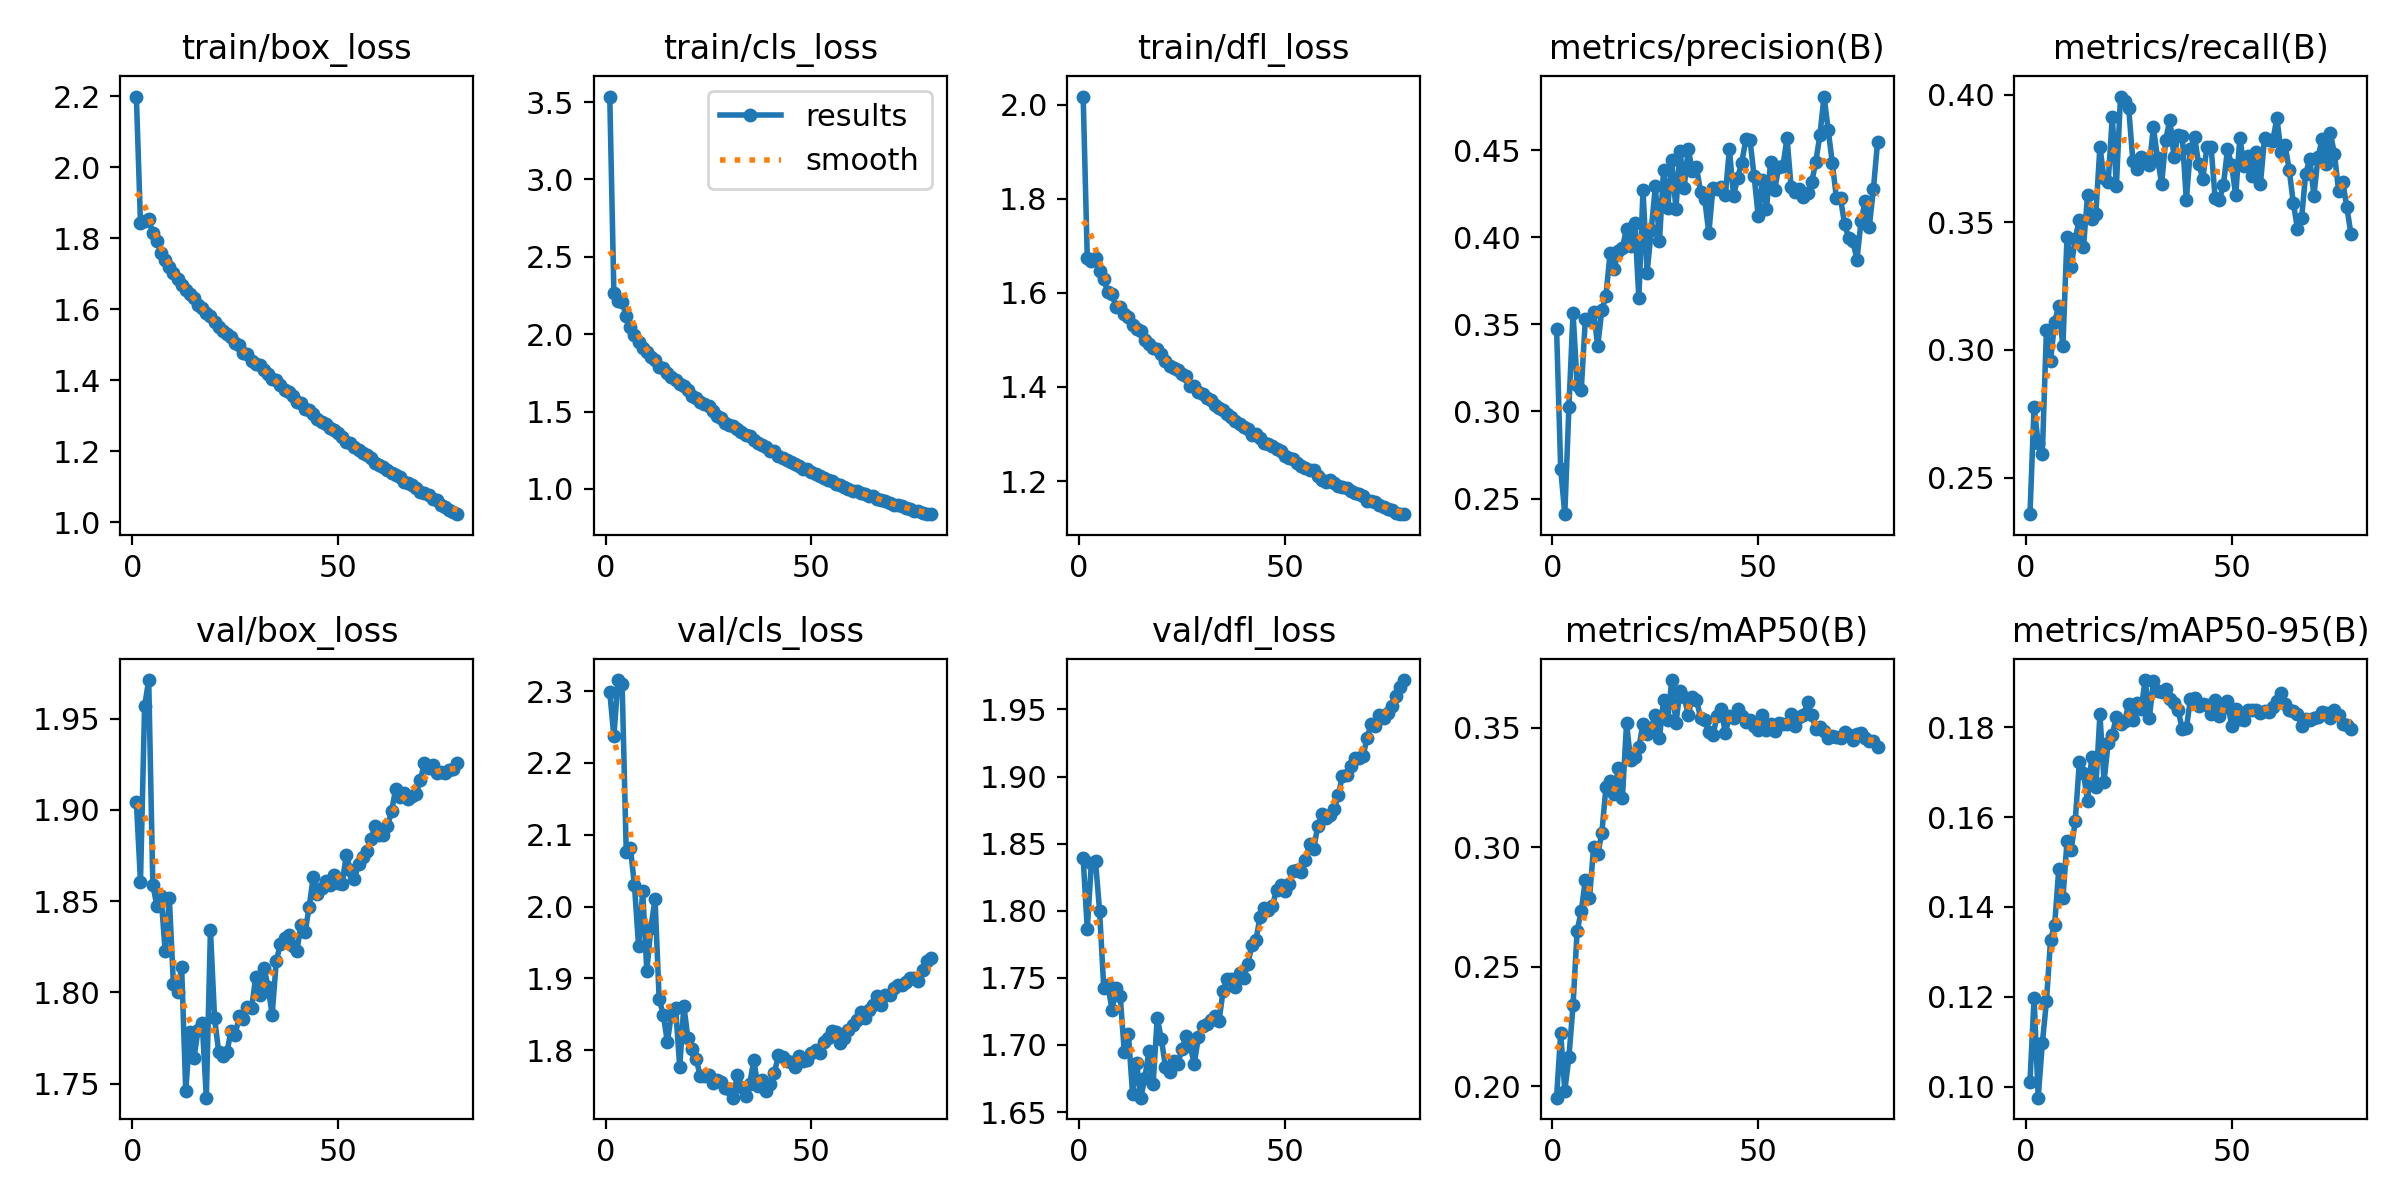

In [7]:
Image(filename=f'/root/.pyenv/runs/detect/train12/results.png', width=900)

In [8]:
print({dataset.location})

{'/root/Work/yolov8/yolov8_medical/Chest-abnormalities-1'}


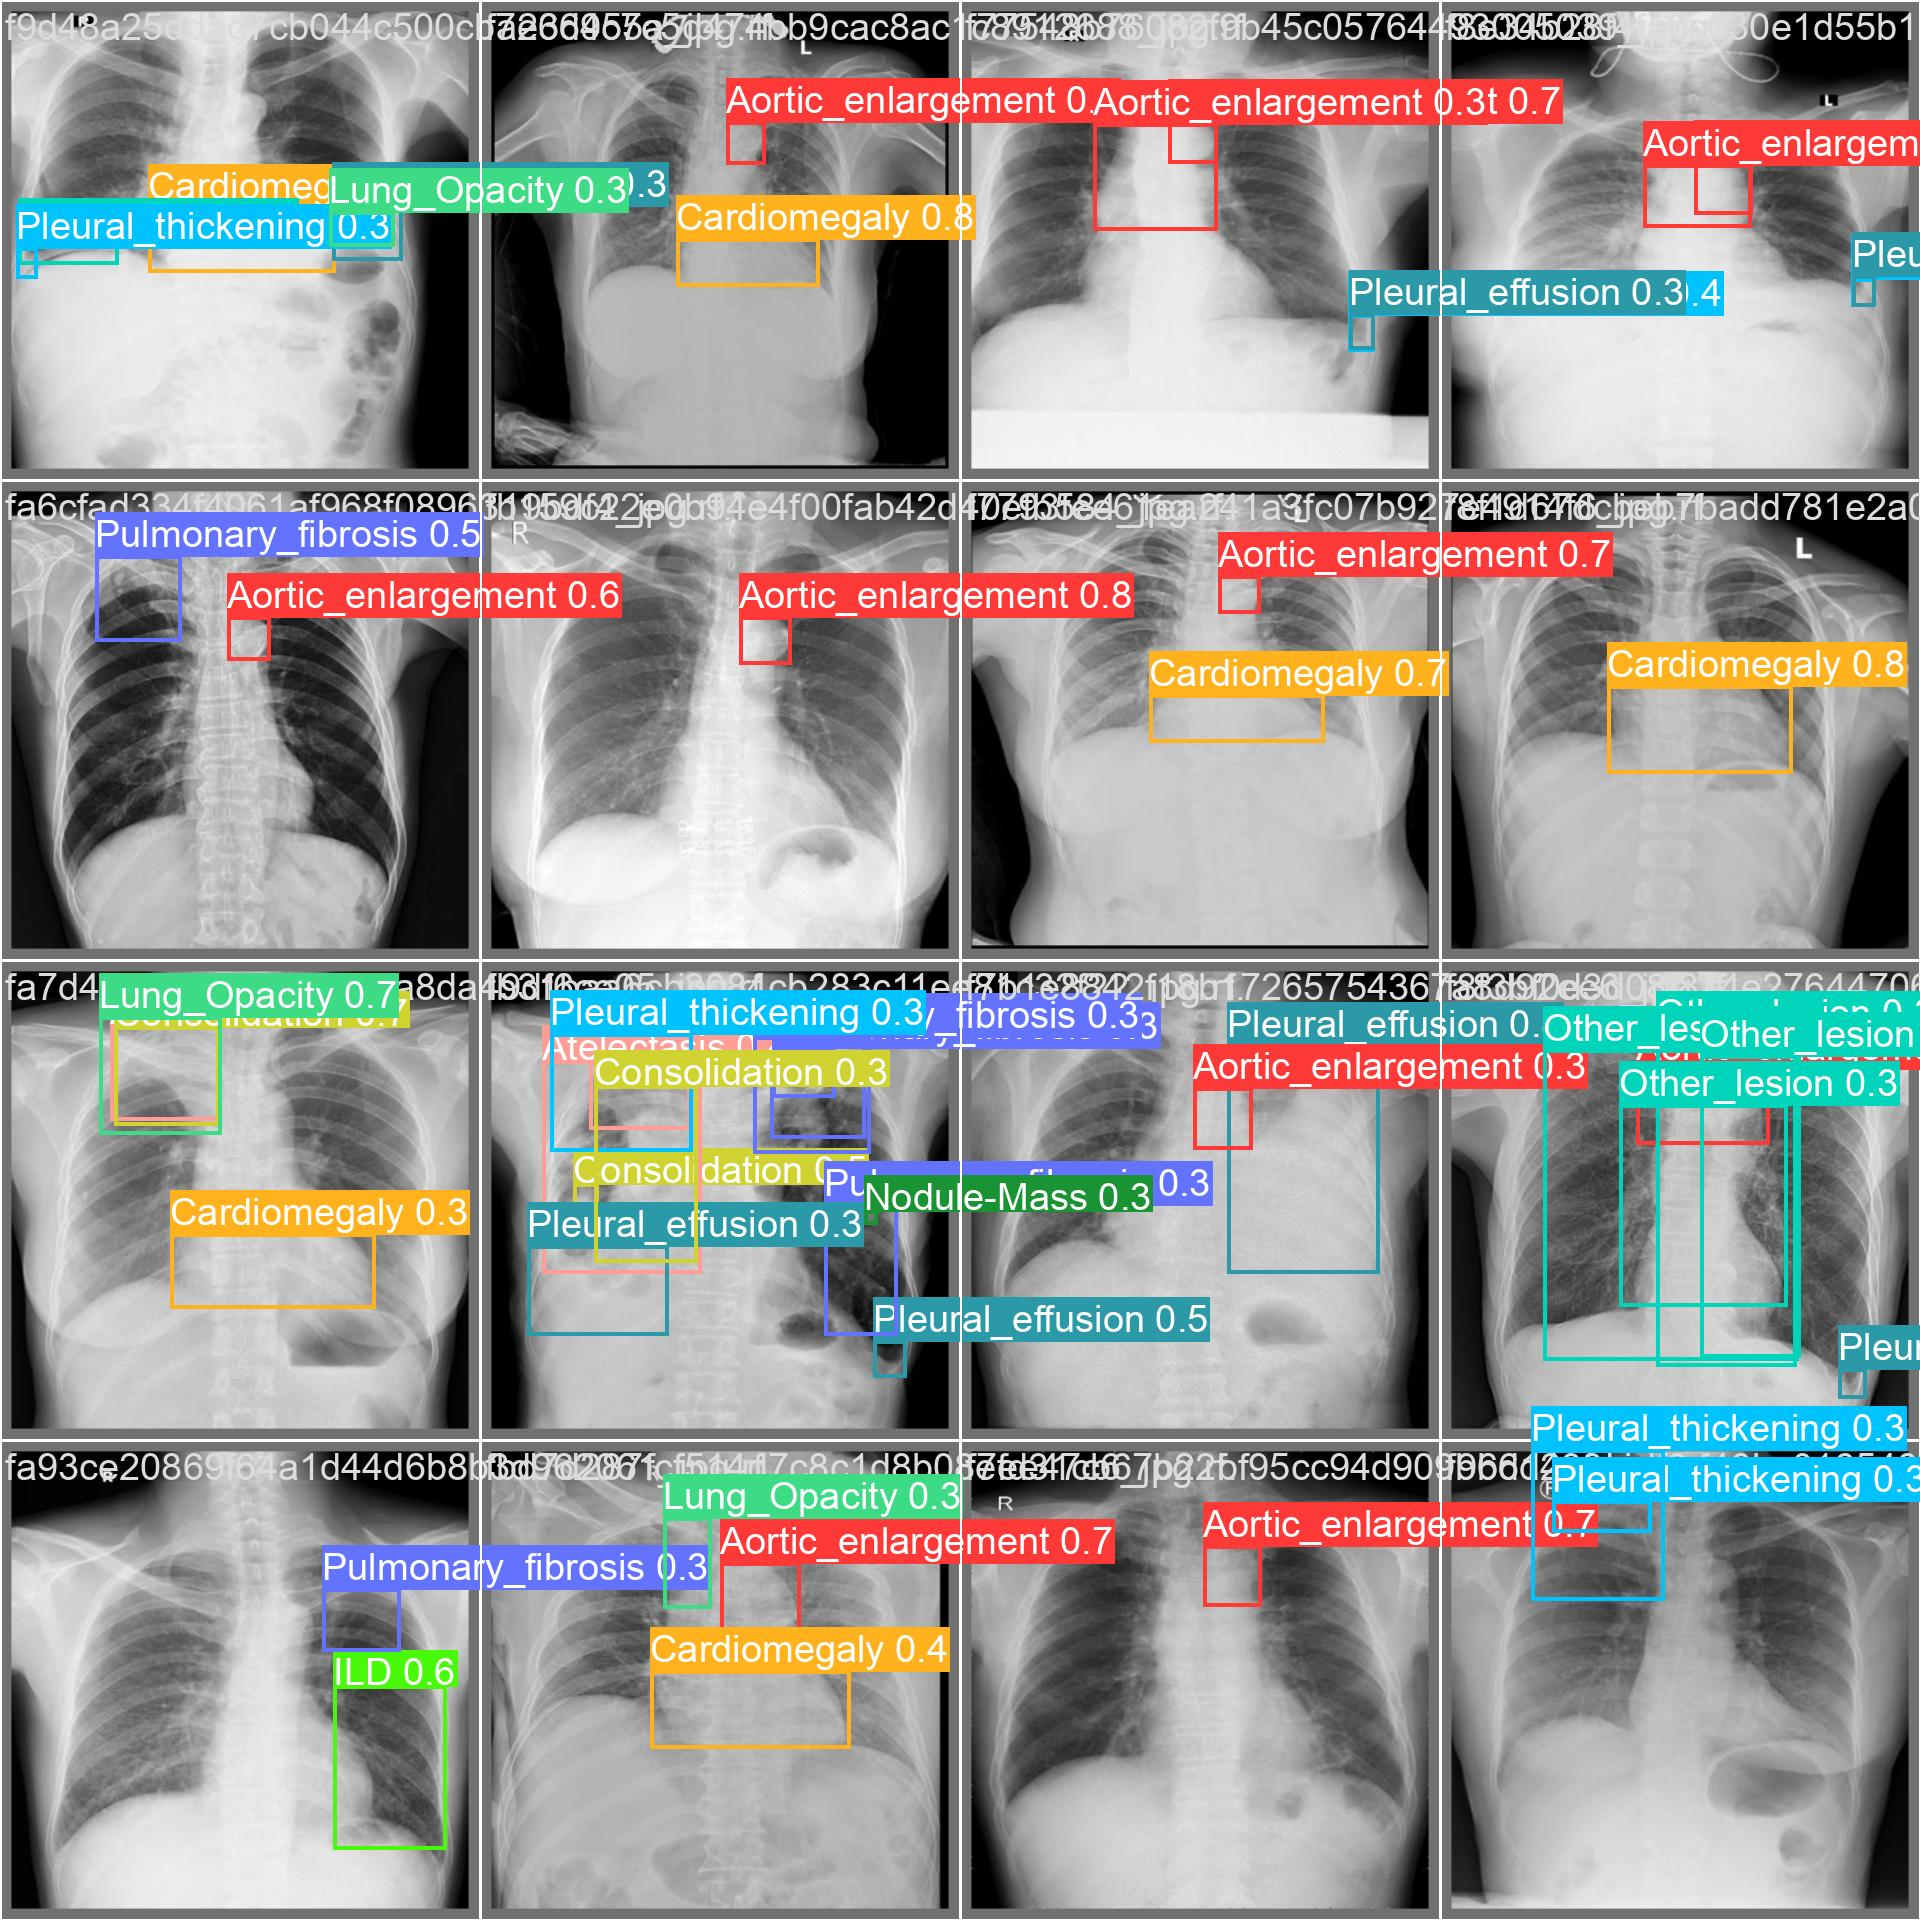

In [9]:
Image(filename=f'/root/.pyenv/runs/detect/train12/val_batch0_pred.jpg', height=600)

In [ ]:
!yolo task=detect mode=val model=/root/.pyenv/runs/detetct/train/weights/best.pt data={dataset.location}/data.yaml

In [ ]:
!yolo task=detect mode=predict model=/root/.pyenv/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/box-2/test/images save_txt=true save_conf=true

In [8]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/root/.pyenv/runs/segment/predict/2.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")

In [2]:
from ultralytics import YOLO
# from ultralytics.yolo.v8.detect.predict import DetectionPredictor

model = YOLO("retina_seg.pt")
model.info()

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/root/Work/yolov8/yolov8_medical/Retina-anomalies-detection-4/Retina-anomalies-detection-4/test/images/*jpg'):
      results = model.predict(source=image_path,project="/root/Work/yolov8/yolov8_medical/result/segment/retina6",save=True)
      print("\n")

YOLOv8x-seg summary: 401 layers, 71754700 parameters, 0 gradients, 344.5 GFLOPs

image 1/1 /root/Work/dataset_medical/retina/img-00052-00001.jpg: 448x640 (no detections), 207.5ms
Speed: 8.1ms preprocess, 207.5ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /root/Work/yolov8/yolov8_medical/result/segment/retina4/predict



image 1/1 /root/Work/dataset_medical/retina/img-00059-00001.jpg: 448x640 (no detections), 17.1ms
Speed: 2.8ms preprocess, 17.1ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /root/Work/yolov8/yolov8_medical/result/segment/retina4/predict2



image 1/1 /root/Work/dataset_medical/retina/img-00006-00001.jpg: 448x640 (no detections), 17.1ms
Speed: 3.1ms preprocess, 17.1ms inference, 0.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /root/Work/yolov8/yolov8_medical/result/segment/retina4/predict3



image 1/1 /root/Work/dataset_medical/retina/img-00114-00001.jpg: 448x640 (no dete

In [3]:
model = YOLO("model/retina_detect_1221.pt")
model.info()

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/root/Work/yolov8/yolov8_medical/Retina-anomalies-detection-4/Retina-anomalies-detection-4/test/images/*jpg'):
      results = model.predict(source=image_path,project="/root/Work/yolov8/yolov8_medical/result/segment/retina5",save=True)
      print("\n")


Model summary: 365 layers, 68156460 parameters, 0 gradients, 258.1 GFLOPs

image 1/1 /root/Work/yolov8/yolov8_medical/Retina-anomalies-detection-4/Retina-anomalies-detection-4/test/images/007-2466-100_jpg.rf.611d94015b40394263be600e4ae17575.jpg: 640x640 4 exs, 16.8ms
Speed: 2.0ms preprocess, 16.8ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /root/Work/yolov8/yolov8_medical/result/segment/retina5/predict



image 1/1 /root/Work/yolov8/yolov8_medical/Retina-anomalies-detection-4/Retina-anomalies-detection-4/test/images/007-3874-200_jpg.rf.d80d155882719b0caa1fa47c23469767.jpg: 640x640 1 ex, 4 hes, 16.8ms
Speed: 2.5ms preprocess, 16.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /root/Work/yolov8/yolov8_medical/result/segment/retina5/predict2



image 1/1 /root/Work/yolov8/yolov8_medical/Retina-anomalies-detection-4/Retina-anomalies-detection-4/test/images/007-3934-200_jpg.rf.c94e8e737e6fd8e26740af7b2c89e718.jpg: